In [62]:
%matplotlib inline
from datascience import *
import numpy as np
import matplotlib.pyplot as plt

In [63]:
ev_data = Table.read_table('data/Atlanta-Mobility-And-Simulated-Charging-Events.csv')

In [67]:
len(np.unique(ev_data['driver']))

2219

In [18]:
charge = ev_data.where(ev_data['energy']>0)
charge


driver,day,time,vehicle.type,distance,scheduled,begin.soc,end.soc,elec.used,gas.used,end.time,timestamp,charger.id,charger.level,duration,energy,after.end.charge,charging.on.whim,time.until.depart
1,2,34.185,leaf,nan,nan,0.315988,0.471689,nan,nan,nan,4/22/11 10:11,9340,3,0.0747366,3.73683,depart,0,0
1,2,34.9088,leaf,nan,nan,0.0412699,0.8,nan,nan,nan,4/22/11 10:54,1884,3,0.36419,18.2095,depart,0,0.873128
1,2,35.796,leaf,nan,nan,0.798389,0.8,nan,nan,nan,4/22/11 11:47,3030,3,0.00077322,0.038661,depart,0,1.82568
1,2,37.6857,leaf,nan,nan,0.780603,0.8,nan,nan,nan,4/22/11 13:41,2290,3,0.00931056,0.465528,depart,0,0.114817
1,2,37.8351,leaf,nan,nan,0.79333,0.8,nan,nan,nan,4/22/11 13:50,2290,3,0.00320164,0.160082,depart,0,0.751059
1,2,38.6206,leaf,nan,nan,0.79333,0.8,nan,nan,nan,4/22/11 14:37,3030,3,0.00320164,0.160082,depart,0,2.16328
1,2,40.848,leaf,nan,nan,0.780603,0.8,nan,nan,nan,4/22/11 16:50,3043,3,0.00931056,0.465528,depart,0,3.1401
1,2,44.0521,leaf,nan,nan,0.780603,0.8,nan,nan,nan,4/22/11 20:03,9082,3,0.00931056,0.465528,depart,0,12.7326
1,3,57.352,leaf,nan,nan,0.436776,1,nan,nan,nan,4/23/11 9:21,11356,0,2.04809,13.5174,depart,0,3.02219
1,5,107.229,leaf,nan,nan,0.320669,0.8,nan,nan,nan,4/25/11 11:13,1823,3,0.230079,11.504,depart,0,0.298451


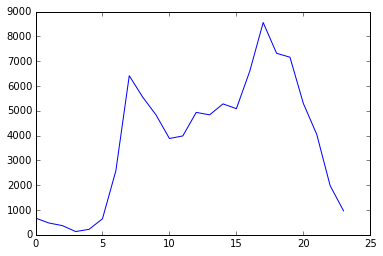

In [107]:
charge['strt_hr'] = np.floor(charge['time'])%24
grp2 = charge.group('strt_hr', np.sum)
plt.plot(grp2['strt_hr']%24, grp2['energy sum'])

In [48]:
hours, energies = [],[]

rest = [charge['duration'][i] for i in range(len(charge['duration']))]
start = charge['time']
hour = np.floor(charge['time'])
for i in range(len(charge['time'])):
    
    while rest[i]>1e-6:
        if max(hour[i], charge['time'][i])+rest[i] < hour[i]+1:
            time_in_hr = rest[i]
            rest[i] = 0

        else:
            #finishes after the hour, only count up to the hour
            time_in_hr = hour[i]+1 - max(hour[i], charge['time'][i])
            rest[i] = rest[i]-time_in_hr

        energy_in_hr = time_in_hr/charge['duration'][i]*charge['energy'][i]
#         print (i, rest[i], time_in_hr, hour[i], charge['duration'][i], charge['energy'][i])
        hours.append(hour[i]), 
        energies.append(energy_in_hr)
        hour[i] = hour[i]+1
        
    
            
        


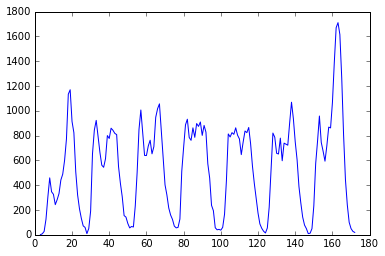

In [61]:
# Simulated charging data for 2350 EV drivers for a week

T = Table()
T = T.with_columns(['hour', hours, 'energy', energies])#.with_rows(new)
T = T.group('hour', sum)
T['INDEX'] = T['hour']
T = T.drop('hour')
T['hour'] = T['INDEX']%24
T['kW'] = T['energy sum']
T = T.drop('energy sum')
T
T.to_csv('data/EV_charge_data.csv')
plt.plot(T['INDEX'], T['kW'])

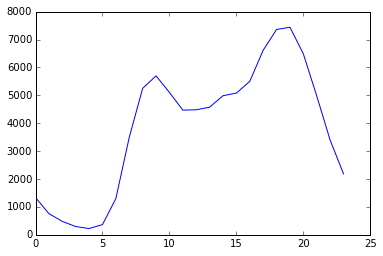

In [50]:
T = Table()
T = T.with_columns(['hour', hours, 'energy', energies])
T['hour'] = T['hour']%24
T = T.group('hour', sum)
plt.plot(T['hour'], T['energy sum'])